In [1]:
# What version of Python do you have?
import sys

import tensorflow.keras
import pandas as pd
import numpy as np
import math
import sklearn as sk
import tensorflow as tf
import pennylane as qml

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Init Plugin
Init Graph Optimizer
Init Kernel


/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Tensor Flow Version: 2.5.0
Keras Version: 2.5.0

Python 3.9.12 | packaged by conda-forge | (main, Mar 24 2022, 23:24:38) 
[Clang 12.0.1 ]
Pandas 1.4.2
Scikit-Learn 1.0.2
GPU is available


In [2]:
0.8/math.sqrt(2)

0.565685424949238

In [3]:
state_1 = np.array([0.8, 0.6])
state_2 = np.array([1 / np.sqrt(2), 1j / np.sqrt(2)]) 
print(state_1)
print(state_2)

[0.8 0.6]
[0.70710678+0.j         0.        +0.70710678j]


In [4]:
np.dot(np.conj(state_2),state_1)

(0.565685424949238-0.42426406871192845j)

In [5]:
np.dot(np.conj(state_1),state_2)

(0.565685424949238+0.42426406871192845j)

In [6]:
print(state_2)
print(np.conj(state_2))
print(np.conjugate(state_2))

[0.70710678+0.j         0.        +0.70710678j]
[0.70710678-0.j         0.        -0.70710678j]
[0.70710678-0.j         0.        -0.70710678j]


In [7]:
State = np.array([1 / np.sqrt(2), 1j / np.sqrt(2)])
def measure_state(state, num_meas=10):
    x_prob = state[0] * np.conj(state[0])
    x_prob = x_prob.real
    y_prob = state[1] * np.conj(state[1])
    y_prob = y_prob.real
    choice_ = [0,1]
    arr = np.random.choice(choice_,num_meas,p=[x_prob,y_prob])
    return arr
measure_state(State)

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [8]:
np.square(0.8) + np.square(0.6)

1.0

In [9]:
1j * 1j

(-1+0j)

In [10]:
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])
H = [[1/np.sqrt(2),1/np.sqrt(2)],
                 [1/np.sqrt(2),-1/np.sqrt(2)]]

T = [[1,0],[0,np.exp(1j * np.pi/4)]]
S = [[1,0],[0,-1]]
Z = [[1,0],[0,-1]]
Y = [[0,-1j],[1j,0]]
X = [[0,1],[1,0]]


In [11]:
H_T = np.matmul(T,H)
H_T_S = np.matmul(S,H_T)
H_S_T_H = np.matmul(H,H_T_S)
ans = np.matmul(H_S_T_H,ket_0)
print(ans)

[0.14644661-0.35355339j 0.85355339+0.35355339j]


In [12]:
np.matmul(np.matmul(H,X),H)

array([[ 1.00000000e+00, -2.23711432e-17],
       [ 2.23711432e-17, -1.00000000e+00]])

In [13]:
np.matmul(np.matmul(X,Y),ket_0) == 1j * np.matmul(Z,ket_0)

array([ True,  True])

In [14]:
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

def initialize_state():
    """Prepare a qubit in state |0>.
    
    Returns:
        array[float]: the vector representation of state |0>.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    ket_0 = np.array([1,0])
    
    ket_1 = np.array([0,1])
    return ket_0

In [15]:
def apply_u(state):
    """Apply a quantum operation."""
    return np.dot(U, state)

In [16]:
def measure_state(state, num_meas):
    """Measure a quantum state num_meas times."""
    p_alpha = np.abs(state[0]) ** 2
    p_beta = np.abs(state[1]) ** 2
    meas_outcome = np.random.choice([0, 1], p=[p_alpha, p_beta], size=num_meas)
    return meas_outcome

In [17]:
def quantum_algorithm():
    """Use the functions above to implement the quantum algorithm described above.
    
    Try and do so using three lines of code or less!
    
    Returns:
        array[int]: the measurement results after running the algorithm 100 times
    """
    
    ##################
    # YOUR CODE HERE #
    new_state = apply_u(initialize_state())
    measure_state_temp = measure_state(new_state,100)
    return(measure_state_temp)
    ##################

    # PREPARE THE STATE, APPLY U, THEN TAKE 100 MEASUREMENT SAMPLES
    pass

In [18]:
quantum_algorithm()

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1])

In [19]:
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

def initialize_state():
    """Prepare a qubit in state |0>.
    
    Returns:
        array[float]: the vector representation of state |0>.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    ket_0 = np.array([1,0])
    ket_1 = np.array([0,1])
    return ket_0

    # PREPARE THE STATE |0>   
    pass


def apply_u(state):
    """Apply a quantum operation."""
    return np.dot(U, state)


def measure_state(state, num_meas):
    """Measure a quantum state num_meas times."""
    p_alpha = np.abs(state[0]) ** 2
    p_beta = np.abs(state[1]) ** 2
    meas_outcome = np.random.choice([0, 1], p=[p_alpha, p_beta], size=num_meas)
    return meas_outcome


def quantum_algorithm():
    """Use the functions above to implement the quantum algorithm described above.
    
    Try and do so using three lines of code or less!
    
    Returns:
        array[int]: the measurement results after running the algorithm 100 times
    """
    
    ##################
    # YOUR CODE HERE #
    new_state = apply_u(initialize_state())
    measure_state_temp = measure_state(new_state,100)
    return(measure_state_temp)
    ##################

    # PREPARE THE STATE, APPLY U, THEN TAKE 100 MEASUREMENT SAMPLES
    pass


In [20]:
quantum_algorithm()

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1])

In [21]:
import pennylane as qml

def my_circuit(theta, phi): 
    ##################
    # YOUR CODE HERE #
    ##################

    # REORDER THESE 5 GATES TO MATCH THE CIRCUIT IN THE PICTURE

    qml.CNOT(wires=[0, 1])
    qml.RX(theta, wires=2)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[2, 0])
    qml.RY(phi, wires=1)
    # This is the measurement; we return the probabilities of all possible output states
    # You'll learn more about what types of measurements are available in a later node
    return qml.probs(wires=[0, 1, 2])
my_circuit(90,180)

probs(wires=[0, 1, 2])

In [22]:
#To run any quantum 
dev = qml.device('default.qubit', wires=['wire_a','wire_b'])


## Creating QNode

In [23]:
# This creates a device with three wires on which PennyLane can run computations
dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def my_circuit(theta, phi, omega):

    ##################
    # YOUR CODE HERE #
    qml.RX(theta,wires=0)
    qml.RY(phi,wires=1)
    qml.RZ(omega,wires=2)
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[1,2])
    qml.CNOT(wires=[2,0])
    ##################

    # IMPLEMENT THE CIRCUIT BY ADDING THE GATES

    # Here are two examples, so you can see the format:
    # qml.CNOT(wires=[0, 1])
    # qml.RX(theta, wires=0)
    



    return qml.probs(wires=[0, 1, 2])


# This creates a QNode, binding the function and device
my_qnode = qml.QNode(my_circuit, dev)

# We set up some values for the input parameters
theta, phi, omega = 0.1, 0.2, 0.3

# Now we can execute the QNode by calling it like we would a regular function
my_qnode(theta, phi, omega)


tensor([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
        2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03], requires_grad=True)

In [24]:
dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

@qml.qnode(dev)
def apply_u():

    ##################
    # YOUR CODE HERE #
    ##################
    qml.QubitUnitary(U,wires=0)
    # USE QubitUnitary TO APPLY U TO THE QUBIT
    


    # Return the state
    return qml.state()


In [25]:
apply_u()

tensor([0.70710678+0.j, 0.70710678+0.j], requires_grad=True)

In [26]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_u_as_rot(phi, theta, omega):

    ##################
    # YOUR CODE HERE #
    ##################
    qml.Rot(phi, theta, omega,wires = 0)
    # APPLY A ROT GATE USING THE PROVIDED INPUT PARAMETERS
    
    # RETURN THE QUANTUM STATE VECTOR

    return qml.state()
theta, phi, omega = 0.1, 0.2, 0.3
apply_u_as_rot(theta, phi, omega )


tensor([0.97517033-0.19767681j, 0.09933467+0.00996671j], requires_grad=True)

In [27]:
import pennylane as qml
dev = qml.device("default.qubit",wires = 1)

In [28]:
@qml.qnode(dev)
def HPH(state):
    qml.Hadamard(wires=0)
    qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    return qml.state()
ket_0 = np.array([1,0])
ket_1 = np.array([0,1])



In [29]:
print(HPH(ket_0).real,ket_0)
print(HPH(ket_1).real,ket_1)

[1. 0.] [1 0]
[1. 0.] [0 1]


In [30]:
@qml.qnode(dev)
def apply_Z_to_plus():
    ket_0 = np.array([1,0])
    qml.Hadamard(wires = 0)
    qml.PauliZ(wires = 0)
    return qml.state()
apply_Z_to_plus()

tensor([ 0.70710678+0.j, -0.70710678+0.j], requires_grad=True)

In [31]:
#Using RZ gate to obtain same effect on |+>
dev = qml.device("default.qubit",wires = 1)
@qml.qnode(dev)
def fake_z():
    qml.Hadamard(wires = 0)
    qml.RZ(np.pi,wires = 0)
    return qml.state()
    

In [32]:
fake_z()

tensor([4.32978028e-17-0.70710678j, 4.32978028e-17+0.70710678j], requires_grad=True)

In [33]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def many_rotations():
    """Implement the circuit depicted above and return the quantum state.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    qml.Hadamard(wires = 0 )
    qml.S(wires=0)
    # qml.T(wires = 0)
    qml.adjoint(qml.T)(wires = 0)
    qml.RZ(0.3,wires = 0)
    # qml.S(wires = 0)
    qml.adjoint(qml.S)(wires = 0)
    return qml.state()
    # IMPLEMENT THE CIRCUIT

    # RETURN THE STATE


many_rotations()

tensor([0.69916673-0.10566872j, 0.56910461-0.41966647j], requires_grad=True)

In [34]:
import pennylane as qml
dev = qml.device('default.qubit',wires = 3)
qml.qnode(dev)
def just_enough():
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)
    qml.S(wires=0)
    qml.Hadamard(wires = 0)
    qml.adjoint(qml.S)(wires = 0)
    qml.Hadamard(wires=0)
    qml.T(wires=1)
    qml.Hadamard(wires=1)
    qml.PauliZ(wires=1)
    qml.Hadamard(wires=1)
    qml.adjoint(qml.T)(wires=2)
    qml.Hadamard(wires=2)
    qml.adjoint(qml.S)(wires=2)
    qml.adjoint(qml.T)(wires = 2)
    qml.Hadamard(wires=2)
    return qml.probs(wires=[0,1,2])

In [35]:
#March 22
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

In [36]:
dev = qml.device('default.qubit',wires=1)

In [37]:
''' Write a QNode that applies qml.RX with an angle of  π to one of the computational basis states. What operation is this? '''
@qml.qnode(dev)
def apply_rx_pi(states):
    if states == 1:
        qml.X(wires=0)
    qml.RX(np.pi,wires=0)
    return qml.state()
ans = apply_rx_pi(1)


In [38]:
dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def apply_rx(theta, state):
    """Apply an RX gate with an angle of theta to a particular basis state.
    
    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.
    
    Returns:
        array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY RX(theta) AND RETURN THE STATE
    qml.RX(theta,wires = 0)
    return qml.state()

# Code for plotting
angles = np.linspace(0, 4*np.pi, 200)
output_states = np.array([apply_rx(t, 0) for t in angles])




In [39]:
dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def apply_ry(theta, state):
    """Apply an RY gate with an angle of theta to a particular basis state.
    
    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.
    
    Returns:
        array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################
    qml.RY(theta,wires = 0)
    return qml.state()
    # APPLY RY(theta) AND RETURN THE STATE

    return

# Code for plotting
# angles_Y = np.linspace(0, 4*np.pi, 200)
output_states_Y= np.array([apply_ry(t, 0) for t in angles])



/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


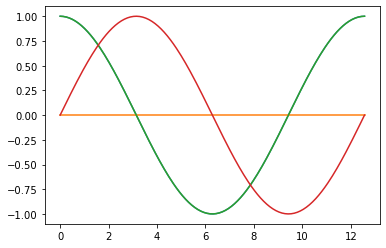

In [40]:
plt.plot(angles,output_states)
plt.plot(angles,output_states_Y)
plt.show()

In [41]:
dev = qml.device("default.qubit", wires=1)

##################
# YOUR CODE HERE #
##################

# ADJUST THE VALUES OF PHI, THETA, AND OMEGA
phi, theta, omega = 0, np.pi/2, np.pi/2

@qml.qnode(dev)
def hadamard_with_rz_rx():
    qml.RZ(np.pi, wires=0)
    qml.RX(1/2 * np.pi, wires=0)
    qml.RZ(3/2 * np.pi, wires=0)
    return qml.state()
print(hadamard_with_rz_rx())


[-0.5+0.5j  0.5-0.5j]


In [42]:
'''
We have |0> ---H---S---T*----Y---
'''
dev = qml.device('default.qubit',wires = 1)
@qml.qnode(dev)
def convert_to_rz_rz():
    qml.Hadamard(wires=0)
    qml.S(wires=0)
    qml.adjoint(qml.T)(wires = 0)
    qml.PauliY(wires=0)
    return qml.state()
convert_to_rz_rz()


tensor([0.5-0.5j       , 0. +0.70710678j], requires_grad=True)

In [43]:
'''
We have |0> ---H---S---T*----Y---
'''
phi, theta, omega =np.pi/2 , np.pi/2, np.pi/2
dev = qml.device('default.qubit',wires = 1)
@qml.qnode(dev)
def convert_to_rz_rz():
    # IMPLEMENT THE CIRCUIT IN THE PICTURE USING ONLY RZ AND RX
    qml.RZ(np.pi/2, wires=0)
    qml.RX(np.pi/2, wires=0)
    qml.RZ(np.pi/2, wires=0)
    qml.RZ(np.pi/2, wires=0)
    qml.adjoint(qml.RZ)(np.pi/4,wires = 0)
    qml.RX(np.pi,wires= 0 )
    qml.RZ(np.pi,wires = 0)
    return qml.state()
convert_to_rz_rz()


tensor([-0.27059805+0.65328148j, -0.27059805-0.65328148j], requires_grad=True)

In [44]:
@qml.qnode(dev)
def check_s_and_t():
    qml.S(wires = 0)
    return qml.state()
print("Direct S: ",check_s_and_t())

@qml.qnode(dev)
def check_s_and_t():
    qml.T(wires = 0)
    return qml.state()
print("Direct T: ",check_s_and_t())

@qml.qnode(dev)
def check_s_and_t():
    qml.RZ(-np.pi/2,wires = 0)
    return qml.state()
print("Rotate Z by 90 for S:",check_s_and_t())

@qml.qnode(dev)
def check_s_and_t():
    qml.RZ(np.pi/4,wires = 0)
    return qml.state()
print("Rotate Z by 45 for T:",check_s_and_t())

Direct S:  [1.+0.j 0.+0.j]
Direct T:  [1.+0.j 0.+0.j]
Rotate Z by 90 for S: [0.70710678+0.70710678j 0.        +0.j        ]
Rotate Z by 45 for T: [0.92387953-0.38268343j 0.        +0.j        ]


In [45]:
'''
given U = (1/sqrt(2))^3[[[1 + T + i(1-T)],[1 - T + i(1+T)]],
           [[1 + T - i(1-T)],[1 - T - i(1+T)]]]
where T = e^(ipi/4)
Obtain above gate using H and T gates.
'''
@qml.qnode(dev)
def U_from_H_and_T():
    qml.Hadamard(wires = 0)
    qml.T(wires=0)
    qml.Hadamard(wires=0)
    qml.T(wires=0)
    qml.T(wires=0)
    qml.Hadamard(wires=0)
    return qml.state()
U_from_H_and_T()




tensor([0.85355339+0.35355339j, 0.35355339+0.14644661j], requires_grad=True)

In [46]:
v = np.array([0.52889389-0.14956775j, 0.67262317+0.49545818j])

##################
# YOUR CODE HERE #
##################

# CREATE A DEVICE


# CONSTRUCT A QNODE THAT USES qml.MottonenStatePreparation
# TO PREPARE A QUBIT IN STATE V, AND RETURN THE STATE
dev = qml.device("default.qubit",wires = 1)
@qml.qnode(dev)
def prepare_state(state=v):
    qml.MottonenStatePreparation(v,wires = 0)
    return qml.state()

# This will draw the quantum circuit and allow you to inspect the output gates
print(prepare_state(v))
print()
print(qml.draw(prepare_state)(v))


[0.49365933-0.24166034j 0.75032489+0.36730546j]

0: ──MottonenStatePreparation(M0)─┤  State


In [47]:
import pennylane as qml
import numpy as np
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_h_and_measure(state):
    """Complete the function such that we apply the Hadamard gate
    and measure in the computational basis.
    
    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise leave it in state 0.
    Returns:
        array[float]: The measurement outcome probabilities.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################
    qml.Hadamard(wires = 0)
    return qml.probs(wires = 0)
    # APPLY HADAMARD AND MEASURE

    return

print(apply_h_and_measure(0))
print(apply_h_and_measure(1))


[0.5 0.5]
[0.5 0.5]


In [48]:
# WRITE A QUANTUM FUNCTION THAT PREPARES (1/2)|0> + i(sqrt(3)/2)|1>
def prepare_psi():
    qml.RX(np.pi * 2/3,wires = 0)
    qml.RZ(np.pi,wires = 0)



# WRITE A QUANTUM FUNCTION THAT SENDS BOTH |0> TO |y_+> and |1> TO |y_->
def y_basis_rotation():
    qml.Hadamard(wires = 0)
    qml.RZ(np.pi/2,wires = 0)

In [49]:
'''
 Now that we know how to produce the two basis states, we can perform a measurement in that basis.
  To do so, we must apply the adjoint of these operations to rotate back from that basis to the computational one.
   Using your quantum function from the previous exercise, perform the basis rotation and return determine the measurement outcome probabilities.
'''
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def measure_in_y_basis():
    ##################
    # YOUR CODE HERE #
    ##################
    
    # PREPARE THE STATE
    prepare_psi()
    qml.adjoint(y_basis_rotation)()
    

    # PERFORM THE ROTATION BACK TO COMPUTATIONAL BASIS
    # qml.adjoint(qml.RZ)(np.pi *3/2,wires = 0)
    # RETURN THE MEASUREMENT OUTCOME PROBABILITIES
    return qml.probs(wires = 0)
    return 
print(measure_in_y_basis())


[0.9330127 0.0669873]


# Observation
Given a matrix and state, calculate the observation.\
XANADU 10



In [50]:
B = [[1,-2j],[2j,2]]
eigen_val = np.linalg.eigvals(B)
eigen_val

array([-0.56155281+0.j,  3.56155281+0.j])

In [51]:
x1 = (-3+np.sqrt(17))/2
x2 = (-3-np.sqrt(17))/2
print(x1,x2)

0.5615528128088303 -3.5615528128088303


In [52]:
ket_0 = 4/5
ket_1 = - 3/5 * np.exp(0j*np.pi/3)
ket_P = np.power(ket_1,2)
ket_f = np.power(ket_0,2)
print(ket_f,ket_P)
print(ket_f+ket_P)

0.6400000000000001 (0.36-0j)
(1+0j)


In [53]:
exp_B = ket_f*eigen_val[0] + ket_P* eigen_val[1]
exp_B

(0.9227652124135276+0j)

In [54]:
psi = np.asarray([ket_0,ket_1])
np.dot(psi.conj(),np.dot(B,psi))


(1.36-5.329070518200751e-17j)

In [55]:
print(psi.conj(),B,psi)

[ 0.8-0.j -0.6-0.j] [[1, (-0-2j)], [2j, 2]] [ 0.8+0.j -0.6+0.j]


In [56]:
np.cos(np.pi/8)

0.9238795325112867

In [57]:
'''
The Circuit is |0> R_x(pi/4),H,Z and measure on Y basis
'''
dev = qml.device('default.qubit',wires  = 1)
@qml.qnode(dev)
def fun():
    qml.RX(np.pi/4,wires = 0)
    qml.Hadamard(wires = 0)
    qml.PauliZ(wires = 0)
    return qml.expval(qml.PauliY(0))
print(fun())


-0.7071067811865471


In [58]:
#Custom Observable
O = np.array([[3, 4j], [-4j, 3]])
@qml.qnode(dev)
def fun():
    qml.RX(np.pi/4,wires = 0)
    qml.Hadamard(wires = 0)
    qml.PauliZ(wires = 0)
    return qml.expval(qml.Hermitian(O,wires=0))
print(fun())



17.11916485072175


/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/pennylane/ops/qubit/matrix_ops.py:83: UserWarning: Operator [[-0.70710678+0.70710678j  0.70710678+0.70710678j]
 [ 0.70710678-1.20710678j  0.5       +0.70710678j]]
 may not be unitary.Verify unitarity of operation, or use a datatype with increased precision.
  warnings.warn(


In [59]:
# An array to store your results
shot_results = []

# Different numbers of shots
shot_values = [100, 1000, 10000, 100000, 1000000]

for shots in shot_values: 
    ##################
    # YOUR CODE HERE #
    ##################
    dev = qml.device("default.qubit",wires = 1,shots = shots)
    @qml.qnode(dev)
    def circuit():
        qml.RX(np.pi/4,wires = 0)
        qml.Hadamard(wires = 0)
        qml.PauliZ(wires = 0)
        return qml.expval(qml.PauliY(0))
    shot_results.append(circuit())

    # CREATE A DEVICE, CREATE A QNODE, AND RUN IT

    # STORE RESULT IN SHOT_RESULTS ARRAY
    


print(qml.math.unwrap(shot_results))


[-0.8, -0.726, -0.7234, -0.70972, -0.707738]


In [60]:
# An array to store your results
shot_results = []

# Different numbers of shots
shot_values = [100, 1000, 10000, 100000, 1000000]

for shots in shot_values: 
    ##################
    # YOUR CODE HERE #
    ##################
    dev = qml.device("default.qubit",wires = 1,shots = shots)
    @qml.qnode(dev)
    def circuit():
        qml.RX(np.pi/4,wires = 0)
        qml.Hadamard(wires = 0)
        qml.PauliZ(wires = 0)
        return qml.sample(qml.PauliY(0))
    uq = np.unique(circuit(),return_counts=True)
    print(uq)


(tensor([-1,  1], requires_grad=True), array([89, 11]))
(tensor([-1,  1], requires_grad=True), array([856, 144]))
(tensor([-1,  1], requires_grad=True), array([8584, 1416]))
(tensor([-1,  1], requires_grad=True), array([85138, 14862]))
(tensor([-1,  1], requires_grad=True), array([853881, 146119]))


In [61]:
dev = qml.device("default.qubit",wires = 1,shots = 100000)
@qml.qnode(dev)
def circuit():
    qml.RX(np.pi/4,wires = 0)
    qml.Hadamard(wires = 0)
    qml.PauliZ(wires = 0)
    return qml.sample(qml.PauliY(0))
outputs_ = circuit()
print(outputs_)
uq = np.unique(outputs_,return_counts=True)
print(uq[0],uq[1])


[-1 -1 -1 ... -1 -1 -1]
[-1  1] [85472 14528]


In [62]:
dev = qml.device("default.qubit", wires=1, shots=100000)

@qml.qnode(dev)
def circuit():
    qml.RX(np.pi/4, wires=0)
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # RETURN THE MEASUREMENT SAMPLES OF THE CORRECT OBSERVABLE

    return qml.sample(qml.PauliY(wires = 0))


def compute_expval_from_samples(samples):
    """Compute the expectation value of an observable given a set of 
    sample outputs. You can assume that there are two possible outcomes,
    1 and -1. 
    
    Args: 
        samples (array[float]): 100000 samples representing the results of
            running the above circuit.
        
    Returns:
        float: the expectation value computed based on samples.
    """

    estimated_expval = 0

    ##################
    # YOUR CODE HERE #
    ##################
    counts_ = np.unique(samples,return_counts = True)
    estimated_expval = (counts_[0][0] * counts_[1][0] + counts_[0][1] * counts_[1][1] )/len(samples)

    # USE THE SAMPLES TO ESTIMATE THE EXPECTATION VALUE

    return estimated_expval


samples = circuit()
print(compute_expval_from_samples(samples))


-0.70792


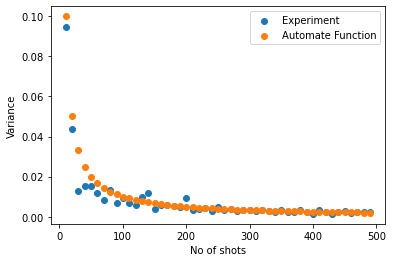

In [63]:
def variance_experiment(n_shots):
    """Run an experiment to determine the variance in an expectation
    value computed with a given number of shots.
    
    Args:
        n_shots (int): The number of shots
        
    Returns:
        float: The variance in expectation value we obtain running the 
        circuit 100 times with n_shots shots each.
    """

    # To obtain a variance, we run the circuit multiple times at each shot value.
    n_trials = 20
    dev = qml.device('default.qubit',wires = 1,shots = n_shots)
    @qml.qnode(dev)
    def circuit():
        qml.Hadamard(wires=0)
        return qml.expval(qml.PauliZ(wires=0))
    answer = []
    for i in range(n_trials):
        answer.append(circuit())

    # RUN THE QNODE N_TRIALS TIMES AND RETURN THE VARIANCE OF THE RESULTS

    return np.var(answer)

def variance_scaling(n_shots):
    """Once you have determined how the variance in expectation value scales
    with the number of shots, complete this function to programmatically
    represent the relationship.
    
    Args:
        n_shots (int): The number of shots
        
    Returns:
        float: The variance in expectation value we expect to see when we run
        an experiment with n_shots shots.
    """
    

    estimated_variance = 1.0

    ##################
    # YOUR CODE HERE #
    ##################
    
    # ESTIMATE THE VARIANCE BASED ON SHOT NUMBER

    return estimated_variance/n_shots

# Various numbers of shots; you can change this
# shot_vals = [10, 20, 30, 100, 200, 400, 1000, 2000, 4000,10000,25000]
shot_vals = [i for i in range(10,500,10)]

# Used to plot your results
results_experiment = [variance_experiment(shots) for shots in shot_vals]
results_scaling = [variance_scaling(shots) for shots in shot_vals]
# plot = plotter(shot_vals, results_experiment, results_scaling)
plt.scatter(shot_vals, results_experiment,label = "Experiment")
plt.scatter(shot_vals, results_scaling,label = "Automate Function")
plt.xlabel("No of shots")
plt.ylabel("Variance")
plt.legend()
plt.show()


The following code contains the Eigen values and Eigen vectors computation for calculating the possible outcomes of the observable and 
the possible states after the measurements. The Eigen values gives the possible outcomes of the observables and the eigen vectors gives 
the possible state after the measurements.\
I used a numpy linear algebra library for calculations.

In [64]:
matrix_A = [[1,2,3],[1,7,8],[8,2,5]]
eigen_values = np.linalg.eigvals(matrix_A)
eigen_vectors = np.linalg.eig(matrix_A)
print(f"Eigen Values: {eigen_values}")
print(f"Eigen Vectors: {eigen_vectors[1]}")

Eigen Values: [12.43630838 -1.16372671  1.72741833]
Eigen Vectors: [[-0.27711909 -0.37156555 -0.01723182]
 [-0.81046065 -0.62618313 -0.83385014]
 [-0.51609936  0.68544419  0.55172185]]


In [65]:
A = [[1,1],[2,1]]
np.linalg.eig(A)

(array([ 2.41421356, -0.41421356]),
 array([[ 0.57735027, -0.57735027],
        [ 0.81649658,  0.81649658]]))

In [66]:
Z = [[1,0],[0,-1]]
np.linalg.eig(Z)

(array([ 1., -1.]),
 array([[1., 0.],
        [0., 1.]]))

In [67]:
# We are given,
a = np.asarray([ 4/5.0 *1,0])
b = np.asarray([0,3/5.0 * np.exp(np.pi/3*1j)*1])
psi = np.asarray([a[0]-b[0],a[1]-b[1]])
B = np.asarray([[1,-2j],[2j,2]])
Possible_outcomes = np.linalg.eigvalsh(B) #For Hermitian Matrix
print(Possible_outcomes)
np.linalg.eigh(np.conj(np.asarray(B)))[1]

[-0.56155281  3.56155281]


array([[-0.78820544-0.78820544j, -0.61541221+0.0058556j ],
       [ 0.61541221-0.61541221j, -0.62126781+0.78820544j]])

The Expected value of an Observables,B, is defined as $
\langle B \rangle = \bra{\psi} B \ket{\psi}
$

In [68]:
expected_B = np.dot(np.conjugate(psi.T),np.dot(B,psi))
expected_B.real

-0.3027687752661221

In [69]:
Expected_on_1000_trials = (max(Possible_outcomes)*54 + min(Possible_outcomes)*944)/1000.0
Expected_on_1000_trials

-0.337782003399859

In [70]:
'''
Codercise 1.10.1. The circult can be found at https://codebook.xanadu.ai/pics/exercise_i101.svg
|0> - R_x(pi/4) - H - Z - <Y>
'''
dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def circuit():
    ##################
    # YOUR CODE HERE #
    ##################
    qml.RX(np.pi/4,wires = 0)
    qml.Hadamard(wires = 0)
    qml.PauliZ(0)

    # IMPLEMENT THE CIRCUIT IN THE PICTURE AND MEASURE PAULI Y

    return qml.expval(qml.PauliY(0))

print(circuit())


-0.7071067811865471


Write a circuit in PennyLane that accepts an integer value, then prepares and returns the corresponding computational basis state vector 
|
n
⟩
. (Assume a 3-qubit device). Try a few examples; does the appearance of the state vector match what you expect given the integer?

In [71]:
dev = qml.device('default.qubit', wires=3)

@qml.qnode(dev)
def make_basis_state(basis_id):
    """Produce the 3-qubit basis state corresponding to |basis_id>.
    
    Note that the system starts in |000>.

    Args:
        basis_id (int): An integer value identifying the basis state to construct.
        
    Returns:
        array[complex]: The computational basis state |basis_id>.
    """
    binary_rep = np.binary_repr(basis_id)
    to_add = 3 - len(binary_rep)
    binary_rep = "0" * to_add + binary_rep
    qml.BasisStatePreparation([int(i) for i in binary_rep],wires=range(3))

    #It can be done by the following too:
    '''
    for idx,val in enumerate(binary_rep): 
        if val == "1": qml.X(wires=idx) 
    '''
    return qml.state()

basis_id = 3
print(f"Output state = {make_basis_state(basis_id)}")


Output state = [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [72]:
[int(i) for i in binary_rep]

NameError: name 'binary_rep' is not defined

## 1.11.2 
Create $\ket{+1}  = \ket{+} \otimes \ket{1}$. Then, return two measurements:
1. the expectation value of Yon the first qubit.
2. the expectation value of Z on the second qubit.

In [ ]:
dev = qml.device("default.qubit",wires = 2)
@qml.qnode(dev)
def two_qubit_circuit():
    ##################
    # YOUR CODE HERE #
    ##################
    qml.Hadamard(0)
    qml.PauliX(1)
    # return qml.state()
    # PREPARE |+>|1>
    return qml.expval(qml.PauliY(0)),qml.expval(qml.PauliZ(1))
    # RETURN TWO EXPECTATION VALUES, Y ON FIRST QUBIT, Z ON SECOND QUBIT
print(two_qubit_circuit())


[ 0. -1.]


 Write a PennyLane circuit that creates the state $\ket{1-}$
. Then, measure the expectation value of the two-qubit observable 
Z
⊗
X
. In PennyLane, you can combine observables using the @ symbol to represent the tensor product, e.g., qml.PauliZ(0) @ qml.PauliZ(1)

In [ ]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def create_one_minus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE |1>|->
    qml.PauliX(0)
    qml.PauliX(1)
    qml.Hadamard(1)

    # RETURN A SINGLE EXPECTATION VALUE Z \otimes X

    return qml.expval(qml.PauliZ(0) @ qml.PauliX(1))


print(create_one_minus())


0.9999999999999996


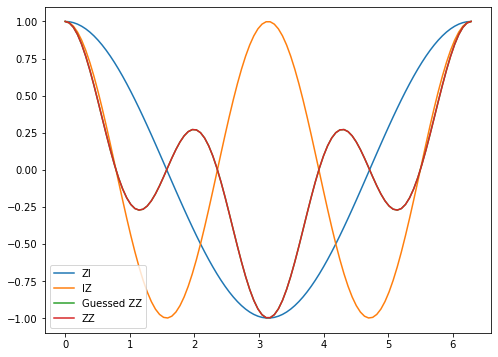

In [ ]:
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def circuit_1(theta):
    """Implement the circuit and measure Z I and I Z.
    Args:
        theta (float): a rotation angle.
        
    Returns:
        float, float: The expectation values of the observables Z I, and I Z
    """
    ##################
    # YOUR CODE HERE #
    ##################  
    qml.RX(theta,wires = 0)
    qml.RY(2*theta,wires  = 1)
    return qml.expval(qml.PauliZ(0)),qml.expval(qml.PauliZ(1))


@qml.qnode(dev)
def circuit_2(theta):
    """Implement the circuit and measure Z Z.
    
    Args:
        theta (float): a rotation angle.
        
    Returns:
        float: The expectation value of the observable Z Z
    """ 

    ##################
    # YOUR CODE HERE #
    ##################  
    qml.RX(theta,wires = 0)
    qml.RY(2*theta,wires  = 1)
    return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))
 



def zi_iz_combination(ZI_results, IZ_results):
    """Implement a function that acts on the ZI and IZ results to
    produce the ZZ results. How do you think they should combine?

    Args:
        ZI_results (array[float]): Results from the expectation value of 
            ZI in circuit_1.
        IZ_results (array[float]): Results from the expectation value of 
            IZ in circuit_2.

    Returns:
        array[float]: A combination of ZI_results and IZ_results that 
        produces results equivalent to measuring ZZ.
    """

    combined_results = np.zeros(len(ZI_results))

    ##################
    # YOUR CODE HERE #
    ##################  

    return ZI_results * IZ_results

 
theta = np.linspace(0, 2 * np.pi, 100)

# Run circuit 1, and process the results
circuit_1_results = np.array([circuit_1(t) for t in theta])

ZI_results = circuit_1_results[:, 0]
IZ_results = circuit_1_results[:, 1]
combined_results = zi_iz_combination(ZI_results, IZ_results)

# Run circuit 2
ZZ_results = np.array([circuit_2(t) for t in theta])

# Plot your results
#plot = plotter(theta, ZI_results, IZ_results, ZZ_results, combined_results)
plt.figure(figsize = (8,6))
plt.plot(theta,ZI_results,label = "ZI")
plt.plot(theta,IZ_results,label = "IZ")
plt.plot(theta,ZZ_results,label = "Guessed ZZ")
plt.plot(theta,combined_results,label = "ZZ")
plt.legend()
plt.show()


# I.12
Write a circuit that implements a CNOT gate between two qubits. Test it out on all four computational basis states. What are the resulting states? Express your answer in a dictionary that takes the form of a truth table, i.e., a table that details a set of output bits given the set of input bits:

In [91]:
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def apply_cnot(basis_id):
    """Apply a CNOT to |basis_id>.

    Args:
        basis_id (int): An integer value identifying the basis state to construct.
      
    Returns:
        array[complex]: The resulting state after applying CNOT|basis_id>.
    """

    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=dev.num_wires)]
    print("Dev",dev.num_wires)
    print("Bits",bits)
    qml.BasisStatePreparation(bits, wires=[0, 1])

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY THE CNOT
    qml.CNOT(wires = [0,1])
    return qml.state()


##################
# YOUR CODE HERE #
##################

# REPLACE THE BIT STRINGS VALUES BELOW WITH THE CORRECT ONES
cnot_truth_table = {
    "00" : "00",
    "01" : "01",
    "10" : "11",
    "11" : "10"
}


# Run your QNode with various inputs to help fill in your truth table
print(apply_cnot(0))


Dev 2
Bits [0, 0]
[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


Implement the following circuit and inspect the output state. Is this state separable or entangled?

In [92]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def apply_h_cnot():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY THE OPERATIONS IN THE CIRCUIT
    qml.Hadamard(wires = 0)
    qml.CNOT(wires=[0,1])
    return qml.state()


print(apply_h_cnot())

##################
# YOUR CODE HERE #
##################

# SET THIS AS 'separable' OR 'entangled' BASED ON YOUR OUTCOME
state_status = "entangled"


[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


## I.12.3

 Write a circuit in PennyLane that implements the following sequence of operations. Return the measurement outcome probabilities.

In [93]:
dev = qml.device('default.qubit', wires=3)

@qml.qnode(dev)
def controlled_rotations(theta, phi, omega):
    """Implement the circuit above and return measurement outcome probabilities.

    Args:
        theta (float): A rotation angle
        phi (float): A rotation angle
        omega (float): A rotation angle

    Returns:
        array[float]: Measurement outcome probabilities of the 3-qubit 
        computational basis states.
    """
    
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY THE OPERATIONS IN THE CIRCUIT AND RETURN MEASUREMENT PROBABILITIES
    qml.Hadamard(wires = 0)
    qml.CRX(theta,wires = [0,1])
    qml.CRY(phi,wires = [1,2])
    qml.CRZ(omega,wires = [0,2])
    return qml.probs(wires = [i for i in range(dev.num_wires)])

theta, phi, omega = 0.1, 0.2, 0.3
print(controlled_rotations(theta, phi, omega))


[5.00000000e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.98751041e-01 0.00000000e+00 1.23651067e-03 1.24480103e-05]
